In [35]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
sys.path.append("/Users/mklukas/nta/htmresearch/")

from htmresearch.support.cans.utils import *
from htmresearch.support.cans.basic_dynamics import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
def can_beanie(x):
    a          = .05
    lambda_net = 4.0
    beta       = 3.0 / lambda_net**2
    gamma      = 1.05 * beta
    
    x_length_squared = x**2
    
    return a*np.exp(-7.*x_length_squared) - a

29.939999999999998


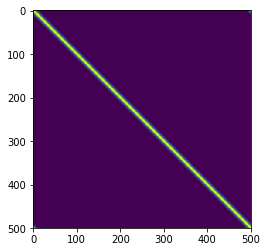

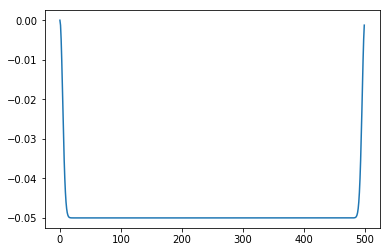

In [112]:


r = 30.
n = 500


X = np.linspace(0.,r, num=n, endpoint=False)
print np.amax(X)

D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
            dij    = np.absolute(X[i] - X[j])
            D[i,j] = np.minimum(r - dij, dij )

        
# J = mexican_hat
# J = W_zero
J = can_beanie



W = create_recurrent_weights(J, D, normalize=False) 
# W[W>0]=0.

plt.imshow(W)
plt.show()

plt.plot(W[0])
plt.show()



In [113]:
# A = create_envelope(n, .1,0.1)

# plt.plot(A)


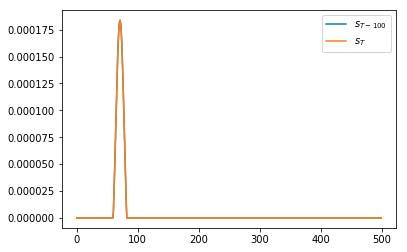

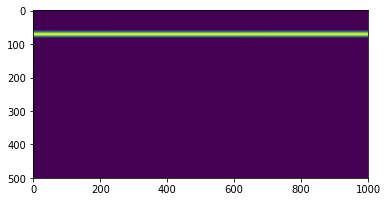

In [114]:
from htmresearch.support.gridcells.utils import cross_correlate
from scipy import ndimage
import numpy.fft as fft
from scipy.special import expit

def relu(x):
    return np.maximum(x, 0.)

def resig(x):
    return np.minimum(np.maximum(x, 0.),1.)

T = 10000
X = np.linspace(0.2,0.4,num=T)

S = np.zeros((T,n))

ms = 0.001

# S[0] = np.zeros(n)
# S[0] = bump(0.1, n)*0.01
S[0] = np.random.sample(n)*0.1


# b = np.ones(n)*.008


B = np.ones((T,n))*0.0001

burst_times = [2000,5000,7000]



run_can(T, W, B, S, dt=100*0.5*ms, tau=100*30.*ms, f=relu)


# plt.plot(b,     label="$b$")
# plt.plot(S[0],     label="$s_0$")
# plt.plot(S[1000], label="$s_{100}$")
plt.plot(S[0-100], label="$s_{T-100}$")
plt.plot(S[-1],    label="$s_T$")
plt.legend()
plt.show()



# for t in burst_times:
#     plt.figure(figsize=(20,5))
#     img = np.concatenate( [
#         S[t-10:t-1],
#         S[t+990:t+1000][::-1]
#     ], axis=0)
#     plt.imshow(img, cmap="viridis")
#     plt.show()
    
# for t in burst_times:
#     plt.figure(figsize=(20,5))
# #     plt.plot(B[t])
#     plt.plot(S[t])
#     plt.plot(S[t+1])
#     plt.show()

    
plt.imshow(S[-1000:,:].T)



In [22]:
t = 10000
f = S[t,:][:]

mid1 = 600
mid2 = 650
g1 = S[t,:mid1][:]
g2 = S[t,mid2:][:]
# f = f - np.amin(f) 
# f = f/np.amax(f)

ff = np.absolute(np.fft.fft(f))
gg1 = np.absolute(np.fft.fft(g1))
gg2 = np.absolute(np.fft.fft(g2))
plt.plot(f)
plt.show()


plt.plot(ff[1:20])
plt.plot(gg1[1:20])
plt.plot(gg2[1:20])
plt.show()


print 1000/np.argmax(ff[1:20])


IndexError: index 10000 is out of bounds for axis 0 with size 10000

done


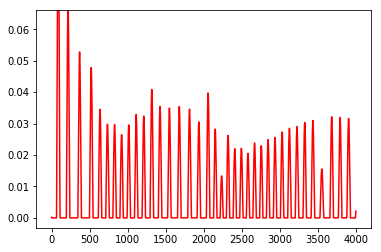

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_ydata(data[num,...])
    return line,


fig = plt.figure()

data = S[np.arange(5000,len(S), step=10)]

l, = plt.plot(np.arange(n), data[0], 'r-', animated=True)
ani = animation.FuncAnimation(fig, update_line, len(data), fargs=(data, l),
                                   interval=50, blit=True)

ani.save('moving_bumps_1-dim.mp4')
print "done"
# plt.show()

40960000
